In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Importing Necessary Libraries

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier, LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
import missingno as miss
import joblib

# Loading Data

In [59]:
os.path.abspath('')

'/Users/mutian/Desktop/Duke ECE/706/IDS706_FinalProject/model_training'

In [60]:
notebook_directory = os.path.dirname(os.path.abspath('__file__'))
datapath = os.path.join(notebook_directory, "all-data.csv")
data = pd.read_csv(datapath, encoding='latin-1', names=['sentiment', 'text'])
data.head()

sentiment                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...

In [61]:
data.shape

(4846, 2)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [63]:

data.describe(include = "all")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/q0/632dhw5x3dj07_5q2hxprwwm0000gn/T/ipykernel_13091/1884402668.py", line 1, in <module>
    data.describe(include = "all")
  File "/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/pandas/core/generic.py", line 10104, in describe
    fill_axis=fill_axis,
  File "/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/pandas/core/generic.py", line 10104, in <listcomp>
    fill_axis=fill_axis,
     ^^^^^^^^^^^^^^
  File "/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/pandas/core/generic.py", line 10084, in describe_1d
    join=join,
           ^^^^
  File "/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/pandas/core/generic.py", line 10018, in describe_categorical_1d
    f"The 'b

In [64]:
data.isna().sum()

sentiment    0
text         0
dtype: int64

In [65]:

miss.bar(data)
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/q0/632dhw5x3dj07_5q2hxprwwm0000gn/T/ipykernel_13091/333738860.py", line 1, in <module>
    miss.bar(data)
  File "/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/missingno/missingno.py", line 225, in bar
    nullity_counts = len(df) - df.isnull().sum()
                     ~~~~~~~~^~~~~~~~~~~~~~~~~~~
  File "/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/pandas/core/ops/common.py", line 65, in new_method
    # For comparison ops, Index does *not* defer to Series
       ^^^^^^^^^^^^^^^^^^^
  File "/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/pandas/core/ops/__init__.py", line 343, in wrapper
  File "/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/pandas/core/ops/ar

# Data Preprocessing

In [66]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mutian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mutian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mutian/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/mutian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [67]:
# making list stopwords for removing stopwords from our text
stop = set(stopwords.words('english'))
stop.update(punctuation)
print(stop)

{'his', 'this', 'do', 'were', "weren't", 'own', 'ain', '+', 'shan', 'there', '-', "you've", 'll', 'where', 'just', 'further', 'isn', 'against', 'who', 'me', 'above', "it's", "wouldn't", 'over', 'each', 'should', 'other', ';', 'out', 'have', 'how', 'during', "shouldn't", 'does', 'that', "don't", '?', 'down', 'wasn', 'both', 'all', '!', 'until', "couldn't", 'having', '*', 'mightn', 'same', "aren't", 'myself', "wasn't", 'weren', 'an', 'after', '>', 'into', 'shouldn', 'can', "mightn't", '/', 'your', 'for', 'so', 'don', 'ours', "needn't", 'than', 'are', 'once', 'i', 'we', 'their', 'to', "isn't", 've', 'any', 'being', 'theirs', 'had', "didn't", 'ourselves', 'they', 'what', 'those', 're', "hasn't", 'themselves', 'off', 'you', 'more', 'doing', 'aren', 'will', '#', "haven't", 'yourselves', 'in', 'itself', '.', 'him', 'then', 'been', 'herself', '|', "you're", 'while', 'be', 'didn', 'hadn', '`', '\\', '_', 'below', 'about', 'again', 'am', '&', 'she', 'if', 'no', ',', "you'd", 'whom', "should've",

In [68]:
# this function return the part of speech of a word.
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [69]:
# Function to clean our text.
lemmatizer = WordNetLemmatizer()
def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

def join_text(text):
    return " ".join(text)

In [70]:

data.text = data.text.apply(clean_review)
data.text = data.text.apply(join_text)

In [71]:
data.head()

sentiment                                               text
0   neutral  According Gran company plan move production Ru...
1   neutral  Technopolis plan develop stage area less 100,0...
2  negative  international electronic industry company Elco...
3  positive  new production plant company would increase ca...
4  positive  According company 's update strategy year 2009...

In [72]:
# splitting data.
x_train,x_test,y_train,y_test = train_test_split(data.text,data.sentiment,test_size = 0.2 , random_state = 0)

In [73]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3876,), (3876,), (970,), (970,))

# Data Visualisation

In [38]:
pos = x_train[y_train[y_train=='positive'].index]
neg = x_train[y_train[y_train=='negative'].index]
neutral = x_train[y_train[y_train=='negative'].index]

/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11

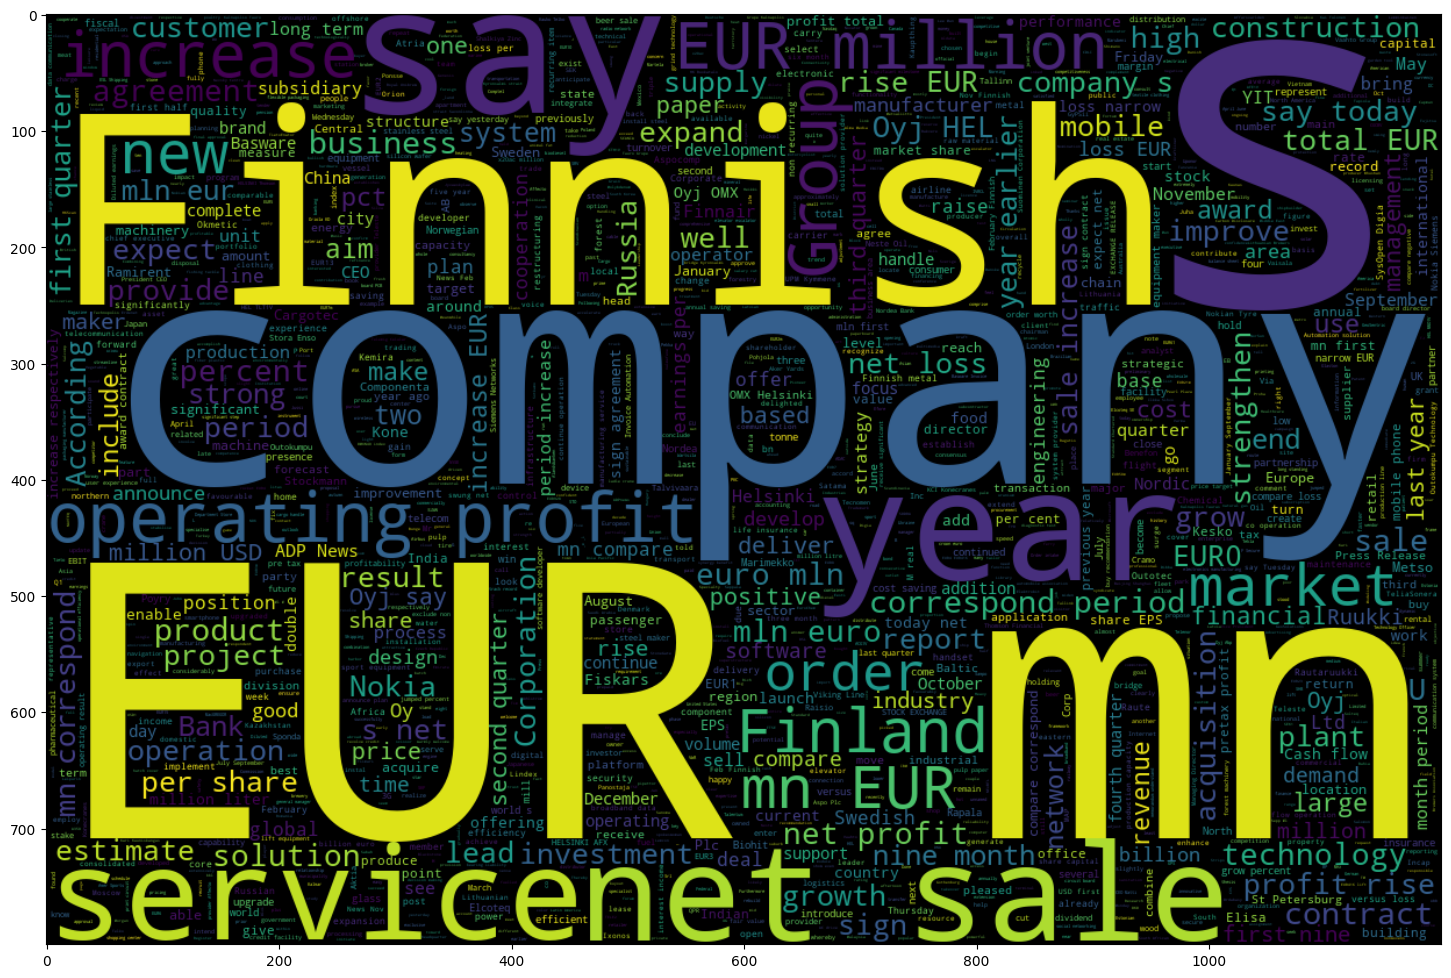

In [39]:
plt.figure(figsize = (18,24)) # Text Reviews with positive Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(pos))
plt.imshow(wordcloud,interpolation = 'bilinear')

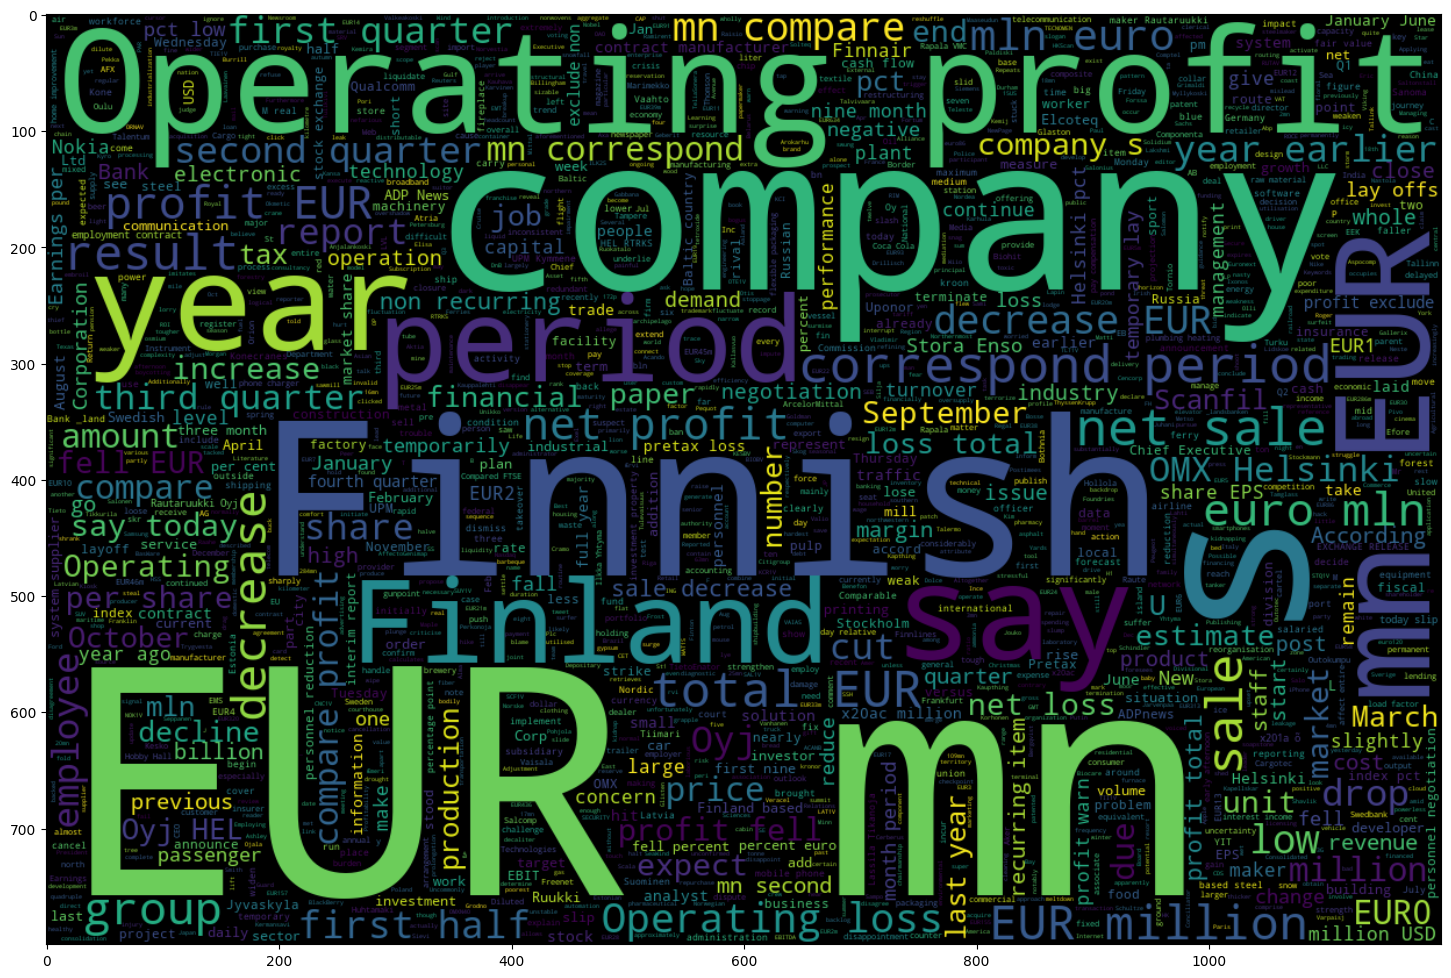

In [40]:
plt.figure(figsize = (18,24)) # Text Reviews with negative Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(neg))
plt.imshow(wordcloud,interpolation = 'bilinear')

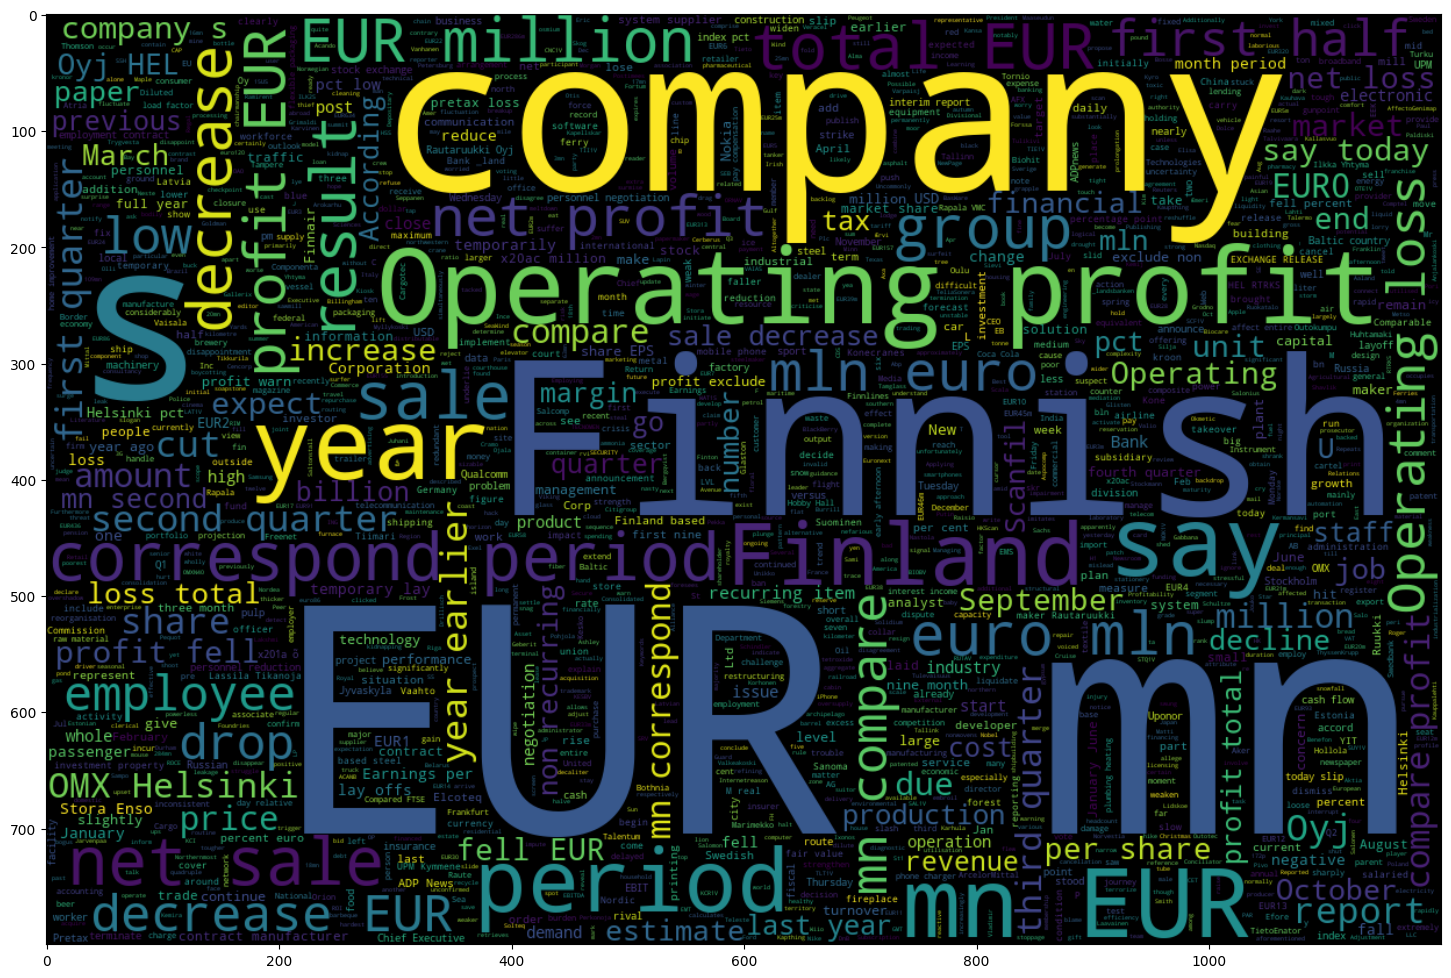

In [41]:
plt.figure(figsize = (18,24)) # Text Reviews with neutral Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(neutral))
plt.imshow(wordcloud,interpolation = 'bilinear')

From above plots we can see few words like company and EUR are common to all three sentiments so we should remove these from our texts as they dont provide any information.

In [89]:
x_train

667     third quarter result also include 400,000 euro...
1505    Based negotiation personnel 20 indicate willin...
2696    Together Latvia Cramo operate 54 rental outlet...
1185    Atria launch campaign September promote CampoM...
3535    much biomass use source locally rest plant 's ...
                              ...                        
1033    Conference Call participate via conference cal...
3264    group say intend initiate within year process ...
1653    second-quarter net sale expect par first quart...
2607               Company turnover amount MEUR 27.9 2007
2732    coker crane supply Tesoro Corporation 's Golde...
Name: text, Length: 3876, dtype: object

In [95]:
x_test

2303    Bristol Port Company seal one million pound co...
2736    paper mill central Maine town Madison soon new...
2790    ALEXANDRIA Va. Oct. 23 -- Hans-Otto Scheck Esp...
2799    Altona state private company Altona chairman K...
2554                                 Registration require
                              ...                        
2343    Raute headquarter Nastola Finland technology c...
4841    LONDON MarketWatch -- Share price end low Lond...
4693    Net sale decrease EUR 220.5 mn EUR 470.0 mn co...
3534                         result 20 person longer need
3353    Segu company PKC 's Polish unit form business ...
Name: text, Length: 970, dtype: object

In [99]:
# creating a variable for count vectorizer which gives us features using the whole text of data.
count_vec = CountVectorizer(max_features=4000, ngram_range=(1, 2), max_df=0.9, min_df=1)
# Change min_df to 1 or any other positive integer depending on your requirements.
# min_df=1 means that a word must appear in at least one document to be included.

# x_train and x_test are assumed to be your training and testing text data.
x_train_features = count_vec.fit_transform(x_train).todense()
x_test_features = count_vec.transform(x_test).todense()
# Save the fitted CountVectorizer
joblib.dump(count_vec, '../vectorizer/count_vectorizer.pkl')

# Later, you can load and use it on new data
loaded_count_vec = joblib.load('../vectorizer/count_vectorizer.pkl')
new_data = pd.Series("we are such a failure ")
new_data_features = loaded_count_vec.transform(new_data).todense()

print(x_train_features.shape, x_test_features.shape)


(3876, 4000) (970, 4000)


In [101]:
new_data_features

matrix([[0, 0, 0, ..., 0, 0, 0]])

# **Predictions**

**1. Multinomial NaiveBayes**

In [56]:
nb_clf = MultinomialNB()
nb_clf.fit(np.array(x_train_features),np.array(y_train))
y_pred = nb_clf.predict(np.array(x_test_features))
acc_bayes = accuracy_score(y_pred, y_test)
f1_bayes = f1_score(y_pred, y_test, average='micro')

print("Accuracy score -->", acc_bayes)
print("F1 score -->", f1_bayes)

ValueError: y should be a 1d array, got an array of shape (3876, 3) instead.

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.52      0.54      0.53       128
     neutral       0.76      0.87      0.81       575
    positive       0.66      0.46      0.54       267

    accuracy                           0.71       970
   macro avg       0.65      0.62      0.63       970
weighted avg       0.70      0.71      0.70       970



**2. Logistic Regression**

In [59]:
lr = LogisticRegression()
lr.fit(np.array(x_train_features),np.array(y_train))
y_pred = lr.predict(np.array(x_test_features))
acc_lr = accuracy_score(y_pred, y_test)
f1_lr = f1_score(y_pred, y_test, average='micro')

print("Accuracy score -->", acc_lr)
print("F1 score -->", f1_lr)

Accuracy score --> 0.756701030927835
F1 score --> 0.756701030927835


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.70      0.52      0.59       128
     neutral       0.78      0.88      0.83       575
    positive       0.70      0.60      0.65       267

    accuracy                           0.76       970
   macro avg       0.73      0.67      0.69       970
weighted avg       0.75      0.76      0.75       970



**3. Simple Vector Machines**

In [60]:
svc = SVC()
svc.fit(np.array(x_train_features),np.array(y_train))
y_pred = svc.predict(np.array(x_test_features))
acc_svc = accuracy_score(y_pred, y_test)
f1_svc = f1_score(y_pred, y_test, average='micro')

print("Accuracy score -->", acc_svc)
print("F1 score -->", f1_svc)

Accuracy score --> 0.7278350515463917
F1 score --> 0.7278350515463918


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.80      0.26      0.39       128
     neutral       0.72      0.97      0.82       575
    positive       0.77      0.42      0.55       267

    accuracy                           0.73       970
   macro avg       0.76      0.55      0.59       970
weighted avg       0.74      0.73      0.69       970



**4. Neural Network with Keras**

In [75]:
y_train[y_train=='positive']=2
y_train[y_train=='neutral']=1
y_train[y_train=='negative']=0
y_test[y_test=='positive']=2
y_test[y_test=='neutral']=1
y_test[y_test=='negative']=0

encoder = OneHotEncoder()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((3876, 3), (970, 3))

In [79]:
# Function to fit our model and plot accuracy curves for train and test data.
def fit_model(optimizer):
    model = Sequential()

    model.add(Dense(units=512, activation='relu', input_dim=x_train_features.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    history = model.fit(x_train_features, y_train, validation_data=(x_test_features, y_test), epochs=100, verbose=0)
    test_acc = model.evaluate(x_test_features, y_test)[1]*100
    print('Accuracy with',optimizer,'optimizer is :',test_acc)

    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.title('opt='+optimizer)
    return model,test_acc
    
    

31/31 [==============================] - 0s 1ms/step - loss: 0.9274 - accuracy: 0.7557
Accuracy with sgd optimizer is : 75.56701302528381
31/31 [==============================] - 0s 1ms/step - loss: 5.1047 - accuracy: 0.7247
Accuracy with rmsprop optimizer is : 72.47422933578491
31/31 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.7361
Accuracy with adagrad optimizer is : 73.60824942588806
31/31 [==============================] - 0s 1ms/step - loss: 2.3944 - accuracy: 0.7330
Accuracy with adam optimizer is : 73.29896688461304
INFO:tensorflow:Assets written to: ../saved_model/assets


INFO:tensorflow:Assets written to: ../saved_model/assets
/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mutian/Desktop/Duke ECE/706/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **

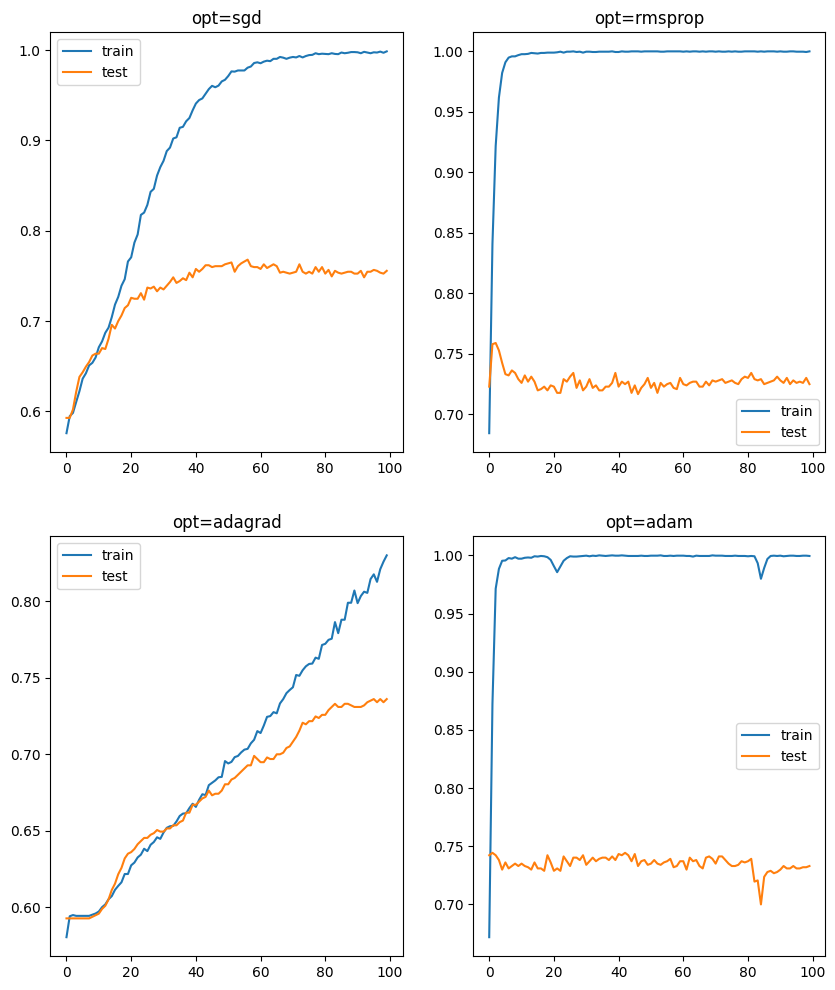

In [81]:
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']
plt.figure(figsize=(10,12))
best_acc = 0
save_path = "../saved_model/"
for i in range(len(optimizers)):
    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for an optimizer
    model,acc = fit_model(optimizers[i])
    if best_acc<acc:
        best_model = model
        best_acc = acc

best_model.save(save_path)
# show learning curves
plt.show()

1. **As we can see we are getting around 76% accuracy.**
2. **I think that's a decent accuracy as we dont have enough data to train our model on.**

In [84]:
from keras.models import load_model
loaded_model=  load_model(save_path)